In [2]:
import tensorflow as tf 
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist=input_data.read_data_sets("MNIST_data",one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [7]:
len(mnist.test.images)

10000

In [10]:
im__temp=mnist.train.images[0]

In [14]:
from skimage import io
import numpy 

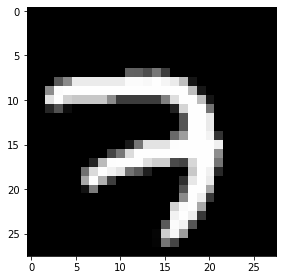

In [15]:
io.imshow(numpy.reshape(im__temp,(28,28)))

In [16]:
mnist.train.labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [18]:
#las imagenes de entrenamiento de MNIST viven en un espacio vectorial de dimension 784
#El dataset se puede pensar como 55000 filas y 784 columnas
#cada dato sel dataset es un numero real entre 1 y 0
#y=softmax(W*x+b)

In [21]:
dim_input=784
n_categories=10

In [23]:
x=tf.placeholder(tf.float32,[None,dim_input])
w=tf.Variable(tf.zeros([dim_input,n_categories]))
b=tf.Variable(tf.zeros([n_categories]))

In [30]:
softmax_args=tf.matmul(x,w)+b
y_hat=tf.nn.softmax(softmax_args)

In [31]:
#Entrenando la red neuronal
#loss\cost: objetivo minimizar las perdidas

In [32]:
from IPython.display import display, Math, Latex

In [33]:
display(Math(r"H_{y}{\hat{y}}=-\sum_{i} y_i log{\hat{y_i}}"))

<IPython.core.display.Math object>

In [35]:
y_=tf.placeholder(tf.float32,[None,10])

In [37]:
cross_entropy=tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y_hat),reduction_indices=[1]))
#tf.nn.softmax_cross_entropy_with_logits(softmax_args,y_)

In [38]:
train_step=tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

In [39]:
sess=tf.InteractiveSession()
tf.global_variables_initializer().run()

In [60]:
for _ in range(5000):
    batch_x, batch_y=mnist.train.next_batch(200)
    sess.run(train_step,feed_dict={x:batch_x, y_:batch_y})

In [61]:
#Evaluacion de red neuronal

In [62]:
correct_predictions=tf.equal(tf.arg_max(y_hat,1),tf.arg_max(y_,1))

In [63]:
accuracy=tf.reduce_mean(tf.cast(correct_predictions,tf.float32))

In [64]:
print(sess.run(accuracy,feed_dict={x:mnist.test.images,y_:mnist.test.labels}))
#0.924

0.9265
